In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import category_encoders as ce
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/censusincomedatacsv/census-income.data.csv")

# Check the head
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

# Checks column names that we just set
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [4]:
X = df.drop(['income'], axis=1)

y = df['income']

In [5]:
# Dataset split with test and train set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [7]:
# Create the instance using the dedicated formula
naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred = naive_bayes.predict(X_test)

y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

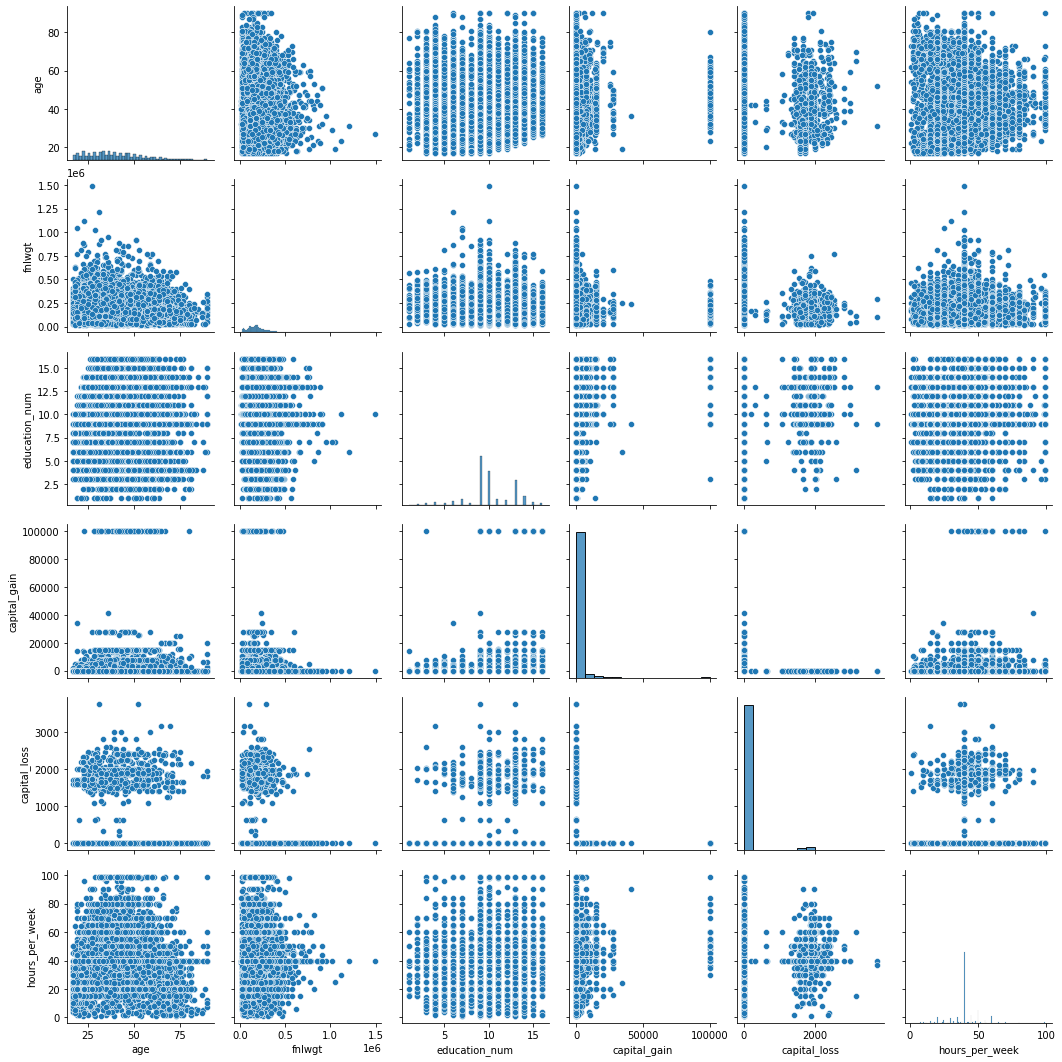

In [9]:
# Default plots based on entire data
sns.pairplot(df, height=2.5)

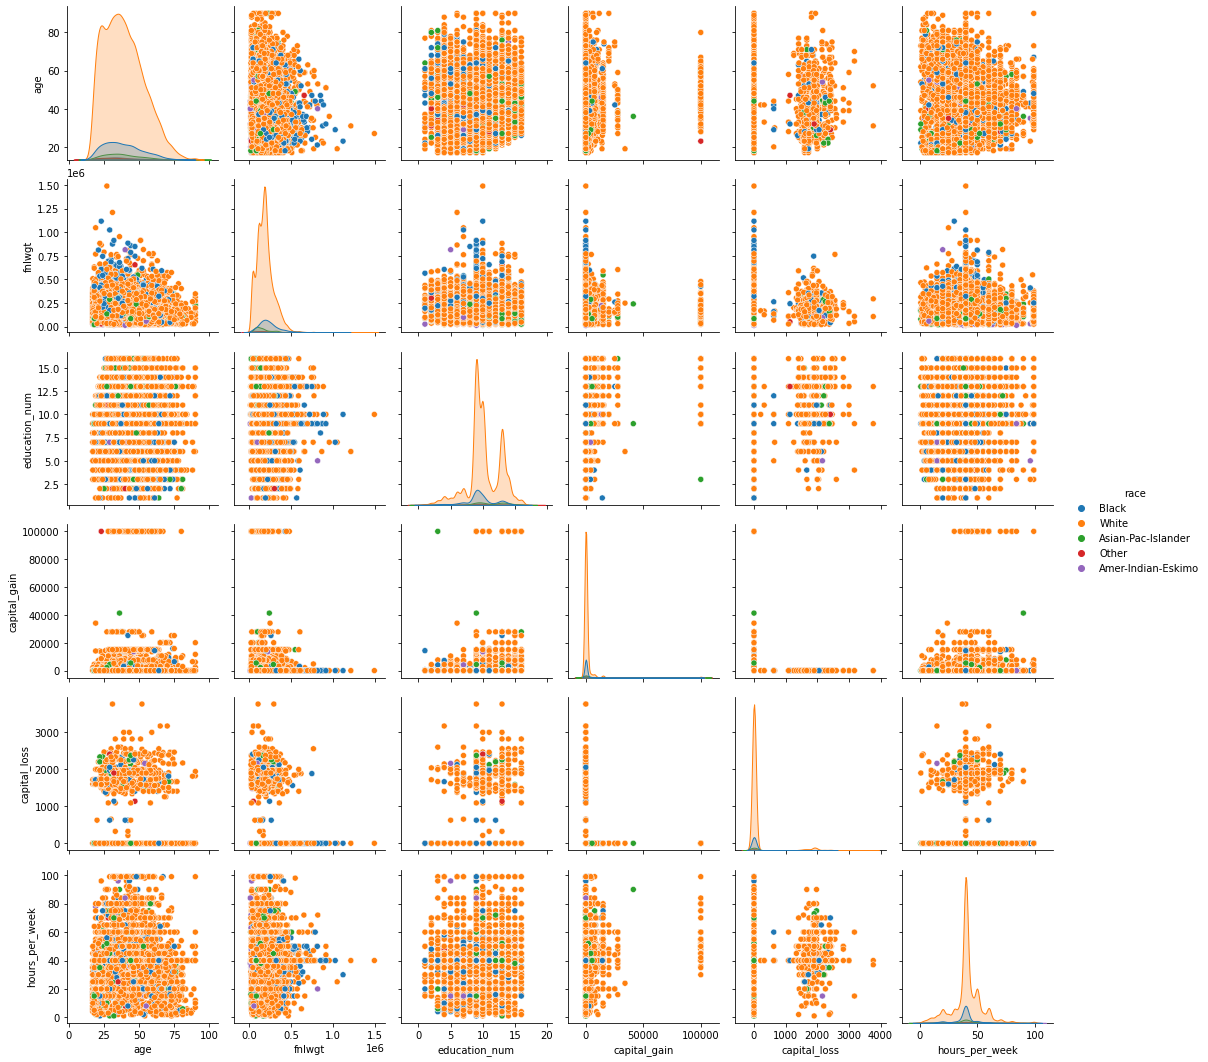

In [10]:
# Plots based on race
sns.pairplot(df, hue='race', height=2.5)

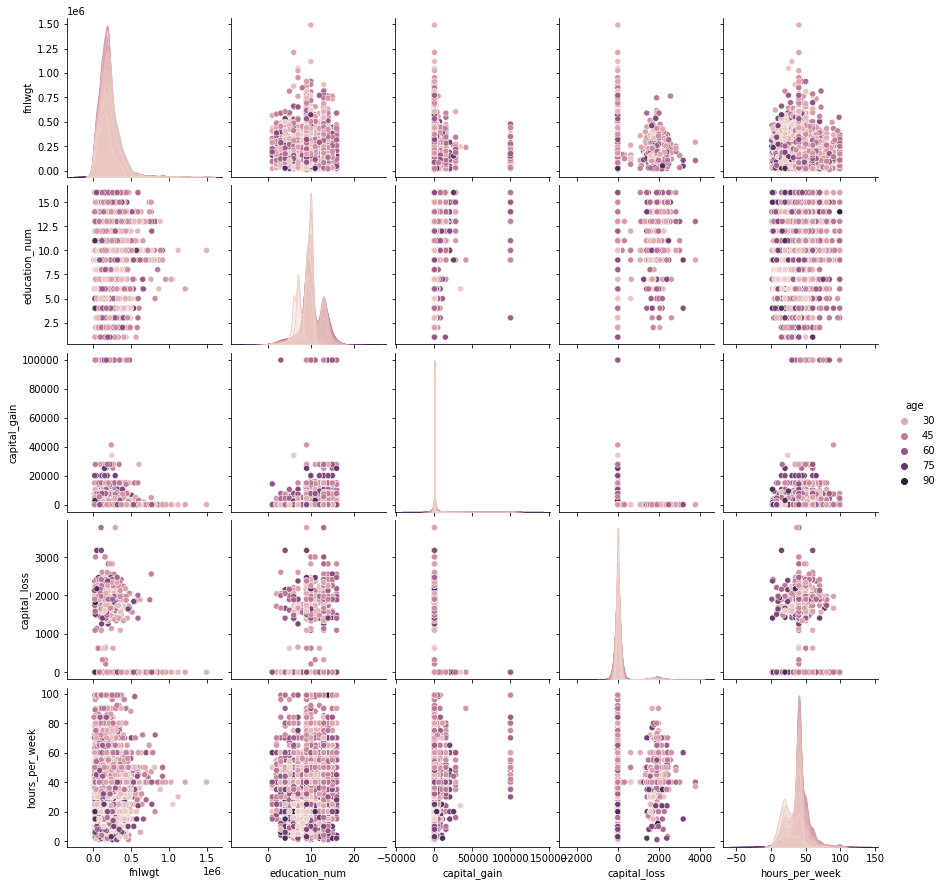

In [11]:
# Plots bsaed on age
sns.pairplot(df, hue='age', height=2.5)

In [12]:
print('Accuracy Score: {}'. format(accuracy_score(y_test, y_pred)))
print('Test-set score: {}'.format(naive_bayes.score(X_test, y_test)))
print('Train-set score: {}'.format(naive_bayes.score(X_train, y_train)))

Accuracy Score: 0.7858751279426817
Test-set score: 0.7858751279426817
Train-set score: 0.7996665496665497
